# Crime Analysis of Seattle Neighborhoods
@infoxiao

March 2021

## Load package and raw data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick
import datetime

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_path = 'data/'
# SPD Crime Data: 2008-Present
# Accessed March 14, 2021
# https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5
crime_dataset = 'SPD_Crime_Data__2008-Present.csv'

# City Annual Stats
# https://data.seattle.gov/dataset/City-Annual-Stats/4as8-nphm
annual_stats_dataset = 'City_Annual_Stats.csv'

# An Urban Village Demographic Area Profile ACS 5-year 2013-2017
# https://data.seattle.gov/dataset/An-Urban-Village-Demographic-Area-Profile-ACS-5-ye/6zth-dtbf
population_dataset_2017 = 'An_Urban_Village_Demographic_Area_Profile_ACS_5-year_2013-2017.csv'

# Urban Village Demographic Area Profile ACS 5-year 2009-2013
# https://data.seattle.gov/dataset/Urban-Village-Demographic-Area-Profile-ACS-5-year-/napx-9dfy
population_dataset_2013 = 'Urban_Village_Demographic_Area_Profile_ACS_5-year_2009-2013.csv'


In [3]:
dfc = pd.read_csv(data_path + crime_dataset)
dfs = pd.read_csv(data_path + annual_stats_dataset)
dfp17 = pd.read_csv(data_path + population_dataset_2017)
dfp13 = pd.read_csv(data_path + population_dataset_2013)

len(dfc), len(dfs), len(dfp17), len(dfp13)

(892364, 23, 31, 31)

## City Annual Stats

In [4]:
# remove weird years: 1995 and years with na data

dfs = dfs[(dfs.Year_ !=2035) & 
          (dfs.Year_ !=1995) & 
          (dfs.Year_ !=2020)].reset_index(drop=True)

len(dfs)

20

In [5]:
dfs.head()

,OBJECTID,City,Year_,Const_Res,FIRE,Manufacturing,Retail,Services,WTU,Government,...,Households,Year_Display,HU_CH_NUMB,HU_CH_PERC,POP_CH_NUMB,POP_CH_PERC,HH_CH_NUMB,HH_CH_PERC,JOB_CH_NUMB,JOB_CH_PERC
0,2,Seattle,2000,22645.0,42471.0,37104.0,41984.0,235336.0,43636.0,47565.0,...,258499.0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,Seattle,2001,21601.0,41671.0,35044.0,42232.0,234726.0,42056.0,48104.0,...,259691.0,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Seattle,2002,19582.0,40710.0,31094.0,38534.0,219499.0,37943.0,47518.0,...,261767.0,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,Seattle,2003,17831.0,41005.0,28425.0,37179.0,217129.0,39494.0,48424.0,...,263791.0,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,Seattle,2004,18157.0,40063.0,28343.0,36347.0,217684.0,36263.0,46741.0,...,264155.0,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# calculate yoy growth up to 2019
dfs['Total_Population_pct_change'] = dfs['Total_Population'].pct_change()
dfs['Housing_Units_pct_change'] = dfs['Housing_Units'].pct_change()
dfs['Total_Jobs_pct_change'] = dfs['Total_Jobs'].pct_change()

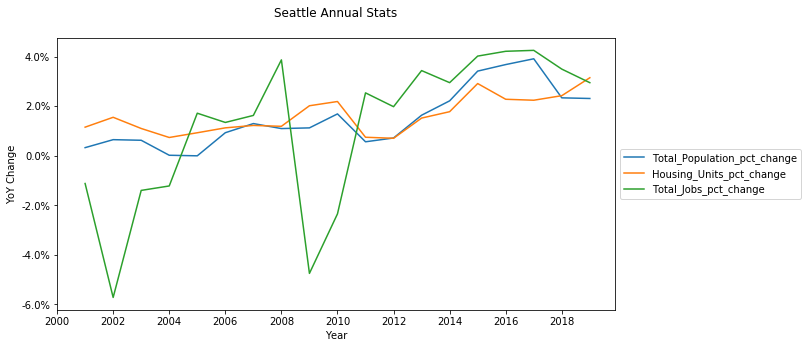

In [7]:
# plot overall stats growth
plt.rcParams["figure.figsize"] = (10,5)
ax = dfs.plot(x='Year_Display', y=[
    'Total_Population_pct_change', 'Housing_Units_pct_change', 'Total_Jobs_pct_change'], kind="line")
plt.xticks(np.arange(2000, 2020, step=2))
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('YoY Change')
plt.xlabel('Year')
plt.title('Seattle Annual Stats\n')
sns.set_context("paper", font_scale=2)    

In [8]:
# dfs[['Year_Display', 'Housing_Units_pct_change']]

In [9]:
# Total population from 2013 to 2019 grew by 20%
dfs.loc[dfs['Year_Display'] == 2019].Total_Population.item() \
/ dfs.loc[dfs['Year_Display'] == 2013].Total_Population.item()

1.1926268751994893

In [10]:
# Housing units grew by 16% in the same time period
# (not much lower than population growth than I imagined actually)
dfs.loc[dfs['Year_Display'] == 2019].Housing_Units.item() \
/ dfs.loc[dfs['Year_Display'] == 2013].Housing_Units.item()

1.1573942376678792

### Population by Neighborhood

In [11]:
pcols = ['UV_AREA', 'TOTAL_POPULATION', 'MEDIAN_AGE']

In [12]:
dfp = dfp17[pcols].merge(dfp13[pcols], 
                         on='UV_AREA', 
                         suffixes=('_17', '_13'))

In [13]:
dfp.head()

,UV_AREA,TOTAL_POPULATION_17,MEDIAN_AGE_17,TOTAL_POPULATION_13,MEDIAN_AGE_13
0,Queen Anne,10637,36.5,10145,36.6
1,Ballard,24140,35.4,21236,36.0
2,Morgan Junction,12928,36.9,11391,34.7
3,Outside - Northwest,12057,47.3,11860,44.9
4,First Hill - Capitol Hill,36520,32.3,32527,32.5


In [14]:
dfp['TOTAL_POPULATION_GROWTH_17_13'] = \
    dfp.TOTAL_POPULATION_17 / dfp.TOTAL_POPULATION_13 - 1
dfp = dfp.sort_values(by='TOTAL_POPULATION_GROWTH_17_13')

Text(0, 0.5, 'Neighborhood')

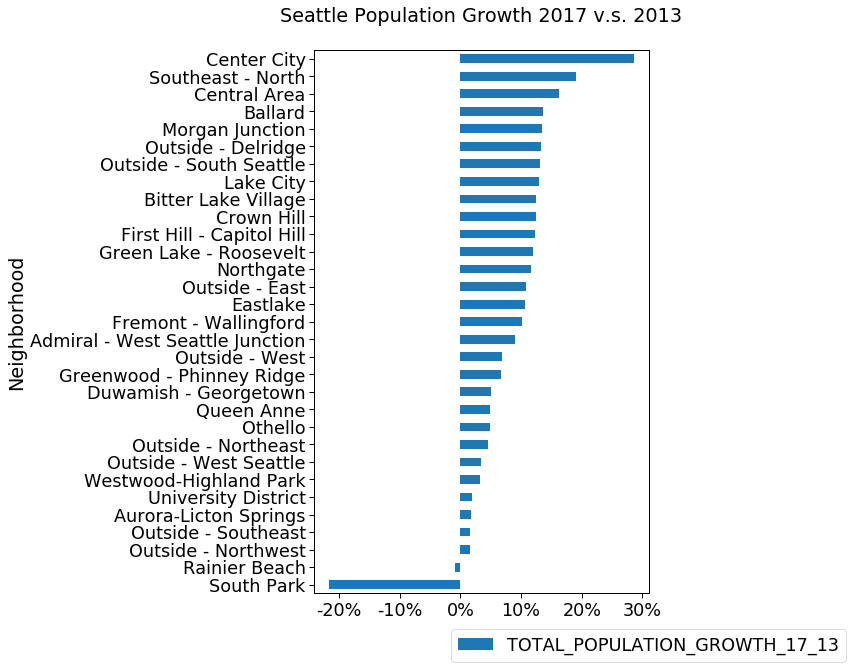

In [15]:
plt.rcParams["figure.figsize"] = (6,10)
ax = dfp.plot(x='UV_AREA', y=[
    'TOTAL_POPULATION_GROWTH_17_13'], kind='barh')
ax.legend(loc='upper center', bbox_to_anchor=(1, -0.05))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Seattle Population Growth 2017 v.s. 2013\n')
plt.ylabel('Neighborhood')

In [16]:
dfp['MEDIAN_AGE_17_13'] = \
    dfp.MEDIAN_AGE_17 - dfp.MEDIAN_AGE_13
dfp = dfp.sort_values(by='MEDIAN_AGE_17_13', ascending=False)

Text(0, 0.5, 'Neighborhood')

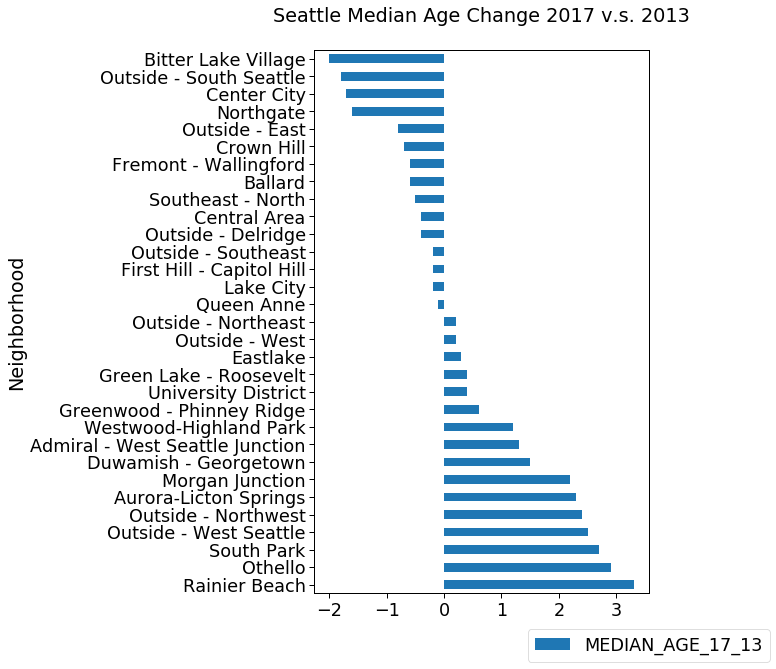

In [17]:
plt.rcParams["figure.figsize"] = (6,10)
ax = dfp.plot(x='UV_AREA', y=[
    'MEDIAN_AGE_17_13'], kind='barh')
ax.legend(loc='upper center', bbox_to_anchor=(1, -0.05))
plt.title('Seattle Median Age Change 2017 v.s. 2013\n')
plt.ylabel('Neighborhood')

## Crime Rate Analysis

### Overall Count

In [18]:
len(dfc)

892364

In [19]:
## correct a typo in the official dataset
#  "DOWNTOWN COMMERICAL" -> "DOWNTOWN COMMERCIAL"
dfc.replace(to_replace='DOWNTOWN COMMERICAL', value='DOWNTOWN COMMERCIAL', inplace=True)

In [20]:
len(dfc[dfc.MCPP == 'DOWNTOWN COMMERCIAL'])

75580

In [21]:
# dfp.UV_AREA
# dfc.MCPP.value_counts()

In [22]:
date_time_format = '%m/%d/%Y %H:%M:%S %p'

In [23]:
# missing offense start time
dfc['Offense Start DateTime'].isnull().sum()

722

In [ ]:
dfc = dfc[~dfc['Offense Start DateTime'].isnull()].reset_index(drop=True)

In [ ]:
# throw out 'FRAUD OFFENSES', which has weird reporting time spikes
len(dfc[dfc['Offense Parent Group'] == 'FRAUD OFFENSES'])/len(dfc)

0.060286527552537904

In [ ]:
dfc = dfc[dfc['Offense Parent Group'] != 'FRAUD OFFENSES'].reset_index(drop=True)

In [ ]:
dfc['time'] = dfc['Report DateTime'].apply(
    lambda x : datetime.datetime.strptime(str(x), date_time_format))

In [ ]:
dfc['year'] = dfc.time.apply(lambda x: x.year)

In [ ]:
dfc['date'] = dfc.time.apply(lambda x: str(x.date()))

In [ ]:
dfc['month'] = dfc.time.apply(lambda x: str(x.date())[:-3])

In [ ]:
dfc.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,...,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,time,year,date,month
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,...,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020-02-05 11:24:31,2020,2020-02-05,2020-02
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,...,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020-02-05 10:06:28,2020,2020-02-05,2020-02
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,...,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020-02-05 09:39:33,2020,2020-02-05,2020-02
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020-02-05 03:30:55,2020,2020-02-05,2020-02
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,...,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020-02-05 12:51:31,2020,2020-02-05,2020-02


In [ ]:
dfc.Offense.value_counts()

Theft From Motor Vehicle                       149912
Burglary/Breaking & Entering                    98402
Destruction/Damage/Vandalism of Property        81595
All Other Larceny                               75247
Simple Assault                                  69317
Shoplifting                                     55757
Motor Vehicle Theft                             53472
Intimidation                                    29247
Trespass of Real Property                       28296
Aggravated Assault                              27947
Theft From Building                             25157
Drug/Narcotic Violations                        23267
Theft of Motor Vehicle Parts or Accessories     22090
Robbery                                         20632
Driving Under the Influence                     16078
Family Offenses, Nonviolent                     10208
Weapon Law Violations                            8538
Bad Checks                                       6633
Stolen Property Offenses    

In [ ]:
dfc[dfc.year==2021].month.value_counts()
# exclude March data because the month is not complete
dfc = dfc[dfc.month != '2021-03'].reset_index(drop=True)
dfc = dfc[dfc['Crime Against Category'] != 'NOT_A_CRIME'].reset_index(drop=True)

In [ ]:
dfc_flat = dfc.groupby('Crime Against Category').month.value_counts().unstack().T.reset_index().set_index('month').stack().reset_index()
dfc_flat = dfc_flat.rename(columns={0: 'crime_count'})

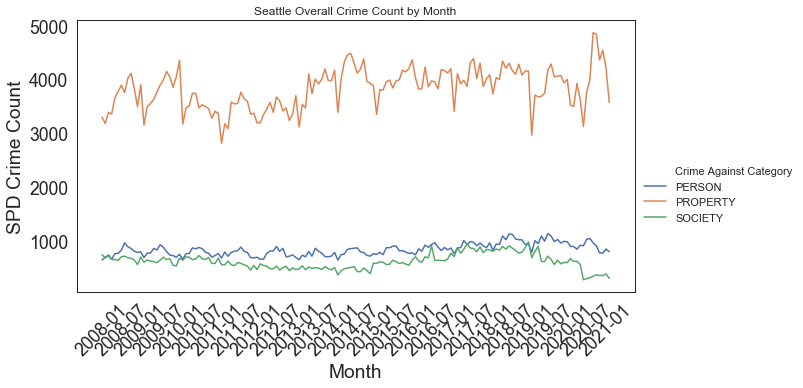

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style("white")
plt.xticks(rotation=45)
sns.set(font_scale = 1)
plot_= sns.lineplot(data=dfc_flat, x='month', y='crime_count', hue='Crime Against Category')
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 6 == 0:  # every x label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xlabel('Month')        
plt.ylabel('SPD Crime Count')
plt.title('Seattle Overall Crime Count by Month')
plot_.legend(loc='upper center', bbox_to_anchor=(1.15, 0.5), framealpha=0)

### Neighborhood Deep Dives

In [ ]:
years_of_interest = [2019, 2020, 2021]
print(len(dfc[dfc.year.isin(years_of_interest)]))
dfc = dfc[dfc.year.isin(years_of_interest)].reset_index(drop=True)

141546


In [ ]:
# dfc[dfc.year == 2020].MCPP.value_counts()

In [ ]:
tmp = dfc.groupby(['MCPP', 'year'])['Report Number'].count().pct_change().reset_index()
tmp = tmp.rename(columns={'Report Number': 'YoY'})
tmp = tmp[tmp.year == 2020].reset_index(drop=True).sort_values(by='YoY')
tmp

,MCPP,year,YoY
14,DOWNTOWN COMMERCIAL,2020,-0.371003
52,SODO,2020,-0.366864
44,PIONEER SQUARE,2020,-0.347015
43,PIGEON POINT,2020,-0.256098
55,SOUTH PARK,2020,-0.254687
46,RAINIER BEACH,2020,-0.229167
2,BALLARD NORTH,2020,-0.199561
54,SOUTH DELRIDGE,2020,-0.185185
49,ROXHILL/WESTWOOD/ARBOR HEIGHTS,2020,-0.153119
4,BELLTOWN,2020,-0.152893


In [ ]:
# narrow down the neighborhood and year of interest

In [ ]:
neighborhoods_of_interest = [
    'DOWNTOWN COMMERCIAL',
    'BELLTOWN',
    'CAPITOL HILL',
    'UNIVERSITY',
    'WALLINGFORD', 
    'FREMONT',
    'BALLARD SOUTH',  
    'BALLARD NORTH',
    'QUEEN ANNE',
]
print(len(dfc[dfc.MCPP.isin(neighborhoods_of_interest)]))
dfc = dfc[dfc.MCPP.isin(neighborhoods_of_interest)].reset_index(drop=True)

49814


In [ ]:
# stack and flatten dataframe for crime count per month per neighborhood
dfcn = dfc.groupby(['MCPP', 'Crime Against Category']).month.value_counts(
    ).unstack().reset_index()
dfcn = dfcn.fillna(0)
dfcn = dfcn.set_index(
    ['MCPP', 'Crime Against Category']).stack().reset_index()
dfcn = dfcn.rename(columns={0: 'crime_count'})
dfcn = dfcn[~dfcn.crime_count.isnull()].reset_index(drop=True)

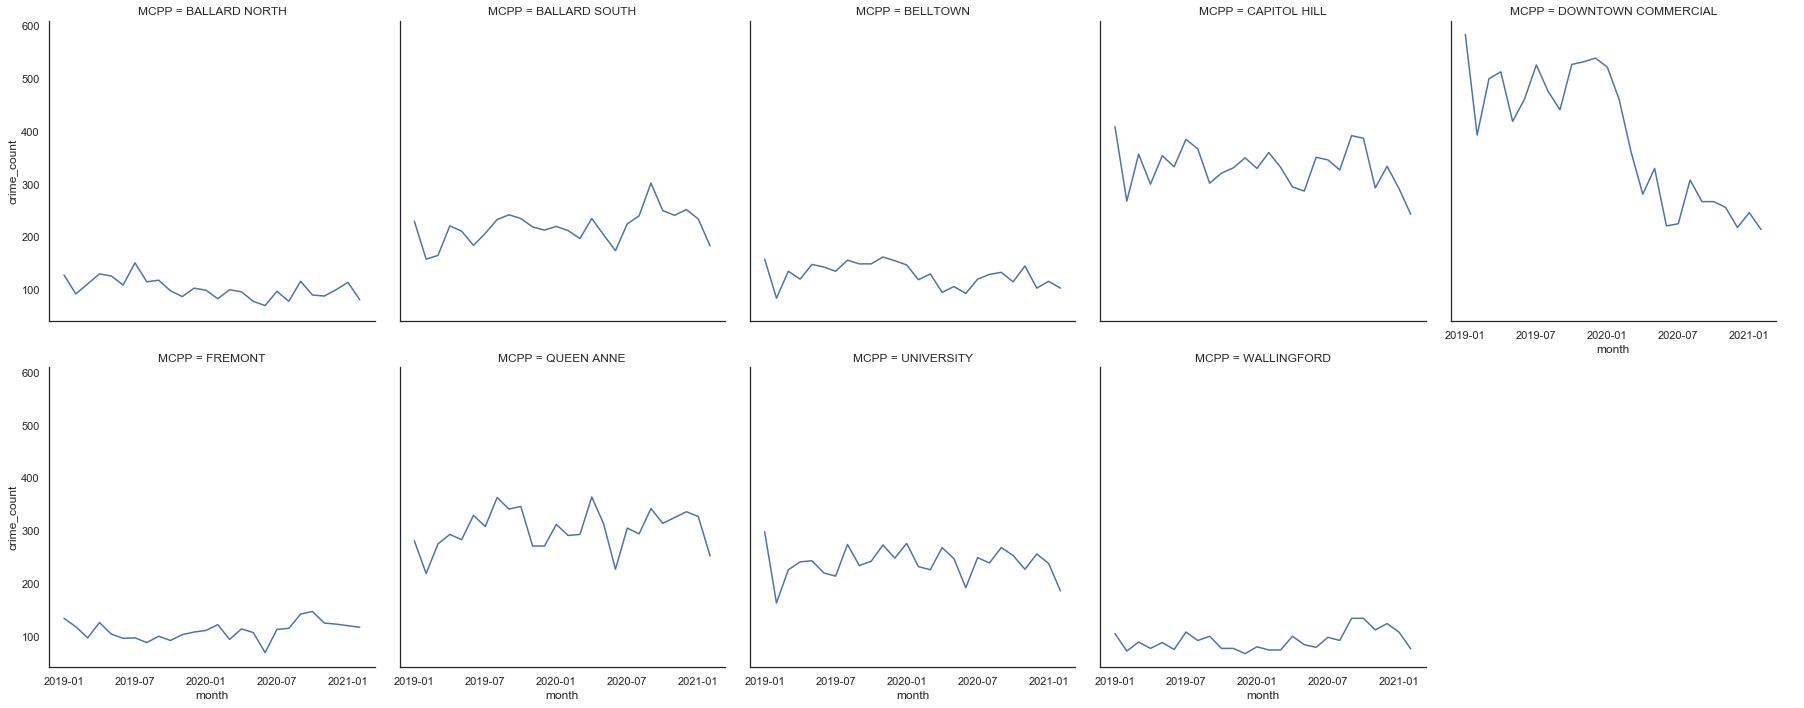

In [ ]:
# plot total crime by neighborhood
sns.set_style('white')
g = sns.FacetGrid(dfcn.groupby(['month','MCPP']).crime_count.sum().unstack().reset_index().set_index('month').stack().reset_index().rename(columns={0: 'crime_count'}), col="MCPP", col_wrap=5, height=5)
g = g.map_dataframe(sns.lineplot, "month", "crime_count")
plt.xticks([0,6,12,18,24])
g.add_legend()

In [ ]:
# plot crime by type by neighborhood
sns.set(font_scale = 1.1)
sns.set_style('white')
g = sns.FacetGrid(dfcn, col="MCPP", col_wrap=3, height=4)
g = g.map_dataframe(sns.lineplot, "month", "crime_count", hue='Crime Against Category')
plt.xticks([0,6,12,18,24])
g.add_legend()

## YoY

In [ ]:
def process_dfc_flat(dfc):
    dfc_covid = dfc[dfc.year >= 2019].reset_index(drop=True)
    dfc_covid_flat = dfc_covid.groupby('Crime Against Category').month.value_counts().unstack().T.reset_index().set_index('month').stack().reset_index()
    dfc_covid_flat = dfc_covid_flat.rename(columns={0: 'crime_count'})
    dfc_covid_flat.sort_values(by=['month', 'Crime Against Category'])
    dfc_covid_flat['year'] = dfc_covid_flat.month.apply(lambda x : int(x.split('-')[0]))
    dfc_covid_flat['cal_month'] = dfc_covid_flat.month.apply(lambda x : int(x.split('-')[1]))
    dfc_covid_flat = dfc_covid_flat.set_index('month')
    dfc_covid_flat['YoY'] = (dfc_covid_flat.crime_count/dfc_covid_flat.shift(12*3).crime_count) - 1
    dfc_covid_flat = dfc_covid_flat.reset_index()
    return dfc_covid_flat

In [ ]:
def plot_overall_crime(MCPP):
    if not MCPP:
        dfc_covid_flat = process_dfc_flat(dfc)
    else:
        dfc_covid_flat = process_dfc_flat(dfc[dfc.MCPP == MCPP].reset_index(drop=True))    
    plt.figure(figsize=(10,5))
    sns.set_style("white")
    plt.xticks(rotation=45)
    sns.set(font_scale = 1)
    plot_= sns.lineplot(data=dfc_covid_flat, 
                        x='month', y='crime_count', hue='Crime Against Category')
    for ind, label in enumerate(plot_.get_xticklabels()):
        if ind % 1 == 0:  # every x label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.xlabel('Month')        
    plt.ylabel('SPD Crime Count')
    if not MCPP:
        MCPP_format = ''
    else:
        MCPP_format = MCPP    
    plt.title('Seattle Overall Crime Count by Month {}'.format(MCPP_format))
    plot_.legend(loc='upper center', bbox_to_anchor=(1.15, 0.5), framealpha=0)
    return dfc_covid_flat

In [ ]:
def plot_yoy(MCPP=None):
    if not MCPP:
        dfc_covid_flat = process_dfc_flat(dfc)
    else:
        dfc_covid_flat = process_dfc_flat(dfc[dfc.MCPP == MCPP].reset_index(drop=True))
    plt.figure(figsize=(10,5))
    sns.set_style("white")
    plt.xticks(rotation=45)
    sns.set(font_scale = 1)
    plot_= sns.barplot(data=dfc_covid_flat[dfc_covid_flat.year > 2019], 
                        x='month', y='YoY', hue='Crime Against Category')
    for ind, label in enumerate(plot_.get_xticklabels()):
        if ind % 1 == 0:  # every x label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.xlabel('Month')        
    plt.ylabel('SPD Crime Count')
    plt.title('Seattle Overall Crime Count by Month')
    plot_.legend(loc='upper center', bbox_to_anchor=(1.15, 0.5), framealpha=0)
    plot_.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    plt.ylabel('YoY Change')
    plt.xlabel('Year')
    if not MCPP:
        MCPP_format = ''
    else:
        MCPP_format = MCPP
    plt.title('SPD Crime YoY Change {}\n'.format(MCPP_format))
    sns.set_context("paper", font_scale=2)
    return dfc_covid_flat

In [ ]:
# MCPP = 'CAPITOL HILL'
MCPP = 'DOWNTOWN COMMERCIAL'
# MCPP = 'QUEEN ANNE'
# MCPP = 'FREMONT'
# MCPP = None

In [ ]:
plot_overall_crime(MCPP)

In [ ]:
dfc_covid_flat = plot_yoy(MCPP)

In [ ]:
print(len(dfc_covid_flat))

In [ ]:
def print_dfc_covid_flat_stats(dfc_covid_flat):
    print('Overall Crime')
    print(dfc_covid_flat.groupby('year').crime_count.sum().pct_change())
    
    print('Property')
    print(dfc_covid_flat[
    dfc_covid_flat['Crime Against Category'] == 'PROPERTY'
        ].groupby('year').crime_count.sum().pct_change())
    
    print('Person')
    print(dfc_covid_flat[
    dfc_covid_flat['Crime Against Category'] == 'PERSON'
        ].groupby('year').crime_count.sum().pct_change())
    
    print('Society')
    print(dfc_covid_flat[
    dfc_covid_flat['Crime Against Category'] == 'SOCIETY'
        ].groupby('year').crime_count.sum().pct_change())
    
#     print('Murder')
#     print(dfc[
#     (dfc['Crime Against Category'] == 'PERSON') &
#     (dfc['Offense'] == 'Murder & Nonnegligent Manslaughter')
#         ].year.value_counts())

In [ ]:
print_dfc_covid_flat_stats(dfc_covid_flat)

In [ ]:
crimes = dfc[(dfc.MCPP == MCPP) 
    & (dfc.year != 2021) 
#     & (dfc['Crime Against Category'] == 'PROPERTY')
].groupby(['year', 'Offense'])['Report Number'].count().reset_index()
crimes = crimes.rename(columns={'Report Number': 'cnt'})
left = crimes[crimes['year'] == 2019].set_index('Offense')
right = crimes[crimes['year'] == 2020].set_index('Offense')
merged = left.join(right, lsuffix='_2019', rsuffix='_2020')
merged['YoY'] = merged.cnt_2020/merged.cnt_2019 - 1
merged.sort_values(by='YoY', ascending=False)